In [1]:
from comet_ml import Experiment

In [2]:
from comet_ml import Experiment
experiment = Experiment(
  api_key = "gFC2BZfeX7KSnZwINu6BF7IcJ",
  project_name = "explore-hackathon",
  workspace="deolabeeb"
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/deolabeeb/explore-hackathon/4f45a1914297451fbe92641dbe6c3326



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, confusion_matrix,
                             ConfusionMatrixDisplay, roc_curve, f1_score, roc_auc_score,
                             classification_report)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pickle as pk
import joblib as jb
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_train = pd.read_csv("data/cleaned_data.csv")

In [5]:
X = df_train['text']
y = df_train['lang_id']

### Adding hyper parameters to TfidfVectorizer()

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['lang_id'], test_size=0.30, random_state=42)



# Define the stop words for South African official languages
stop_words_sa = ['english', 'afrikaans', 'ndebele', 'sotho', 'swazi', 'tsonga', 'tswana', 'venda', 'xhosa', 'zulu']

# Define the hyperparameters for TfidfVectorizer
tfidf_params = {
    'max_features': 180000,
    'ngram_range': (1, 2),
    'stop_words': stop_words_sa,  # Include stop words for South African official languages
    'sublinear_tf': True,
    'use_idf': True,
    'smooth_idf': True
}

# Create the TfidfVectorizer with the specified hyperparameters
vectorizer = TfidfVectorizer(**tfidf_params)
X_train_vectorized = vectorizer.fit_transform(X_train)                           
                             
# Create and train the Multinomial Naive Bayes classifier with best parameters
naive_bayes = MultinomialNB(alpha=0.1, fit_prior=False)

# Add more hyperparameters
naive_bayes.set_params(alpha=0.1, fit_prior=True)
naive_bayes.fit(X_train_vectorized, y_train)
                          
# Evaluate the classifier on the test set
X_test_vectorized = vectorizer.transform(X_test)
accuracy = naive_bayes.score(X_test_vectorized, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.9991919191919192


In [7]:
# Make predictions on the test data
y_pred = naive_bayes.predict(X_test_vectorized)

In [8]:
# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1)

Precision: 0.9991923671808949
Recall: 0.9991919191919192
F1 score: 0.9991916930294164


Confusion Matrix:
[[895   0   0   0   0   0   0   0   0   0   0]
 [  0 909   0   0   0   0   0   0   0   0   0]
 [  0   0 879   0   0   0   0   0   0   0   0]
 [  0   0   0 940   1   0   0   0   0   0   0]
 [  0   0   0   0 918   0   0   0   0   0   0]
 [  0   0   0   0   0 908   0   0   0   0   0]
 [  1   0   0   1   0   0 880   0   0   0   0]
 [  0   0   0   0   0   0   0 857   0   0   0]
 [  0   0   0   0   0   0   0   0 936   0   0]
 [  1   0   1   0   0   0   0   0   0 919   1]
 [  0   1   0   0   0   0   0   0   0   1 851]]


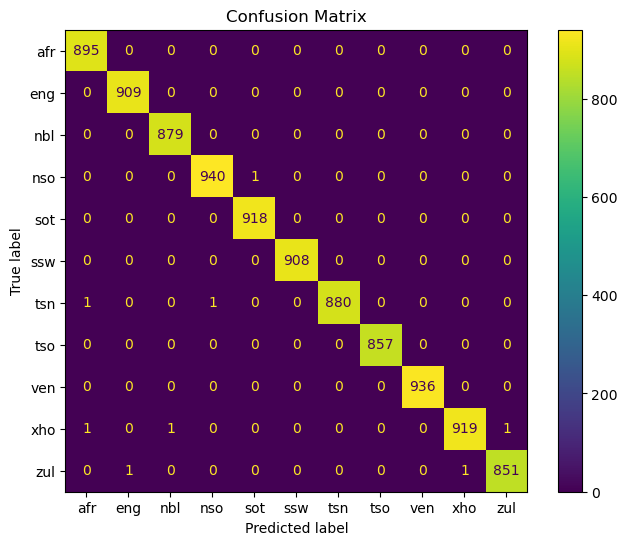

In [9]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_).plot(ax=ax)
plt.title('Confusion Matrix')
plt.show()

In [10]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       895
         eng       1.00      1.00      1.00       909
         nbl       1.00      1.00      1.00       879
         nso       1.00      1.00      1.00       941
         sot       1.00      1.00      1.00       918
         ssw       1.00      1.00      1.00       908
         tsn       1.00      1.00      1.00       882
         tso       1.00      1.00      1.00       857
         ven       1.00      1.00      1.00       936
         xho       1.00      1.00      1.00       922
         zul       1.00      1.00      1.00       853

    accuracy                           1.00      9900
   macro avg       1.00      1.00      1.00      9900
weighted avg       1.00      1.00      1.00      9900



In [11]:
df_test = pd.read_csv("data/cleaned_test_data.csv")

In [15]:
# Convert text data into numerical representation
X_test_final = vectorizer.transform(df_test['text'])

# Make predictions on the test data
y_pred_test_6 = naive_bayes.predict(X_test_final)


In [16]:

# Create a DataFrame for submission
submission_6 = df_test[['index']].copy()
submission_6['lang_id'] = y_pred_test_5
submission_6.columns = ['index', 'lang_id']

# Save the submission DataFrame to a CSV file
submission_6.to_csv('data/submission_6.csv', index=False)

In [17]:
submission_6

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot


In [21]:
# Save the trained model
joblib.dump(naive_bayes, 'data/NEW_GRID_KNN_model.pkl')

['data/NEW_GRID_KNN_model.pkl']

In [22]:
# Log the metrics to Comet
experiment.log_metric('accuracy', accuracy)
experiment.log_metric('precision', precision)
experiment.log_metric('recall', recall)
experiment.log_metric('f1_score', f1)

# Log the confusion matrix

experiment.log_image('confusion_matrix', 'confusion_matrix.png')

# Log the classification report
experiment.log_text('classification_report', classification_rep)

COMET ERROR: We failed to read file confusion_matrix for uploading.
Please double-check the file path and permissions
COMET WARNING: Passed step value '              precision    recall  f1-score   support\n\n         afr       1.00      1.00      1.00       895\n         eng       1.00      1.00      1.00       909\n         nbl       1.00      1.00      1.00       879\n         nso       1.00      1.00      1.00       941\n         sot       1.00      1.00      1.00       918\n         ssw       1.00      1.00      1.00       908\n         tsn       1.00      1.00      1.00       882\n         tso       1.00      1.00      1.00       857\n         ven       1.00      1.00      1.00       936\n         xho       1.00      1.00      1.00       922\n         zul       1.00      1.00      1.00       853\n\n    accuracy                           1.00      9900\n   macro avg       1.00      1.00      1.00      9900\nweighted avg       1.00      1.00      1.00      9900\n' is not a number, 

{'web': 'https://www.comet.com/api/asset/download?assetId=0cbb53f6cd7a486385265f0c140178eb&experimentKey=4f45a1914297451fbe92641dbe6c3326',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=0cbb53f6cd7a486385265f0c140178eb&experimentKey=4f45a1914297451fbe92641dbe6c3326',
 'assetId': '0cbb53f6cd7a486385265f0c140178eb'}

In [23]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/deolabeeb/explore-hackathon/4f45a1914297451fbe92641dbe6c3326
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.9986868686868687
COMET INFO:     f1_score  : 0.9991916930294164
COMET INFO:     precision : 0.9991923671808949
COMET INFO:     recall    : 0.9991919191919192
COMET INFO:   Parameters:
COMET INFO:     alpha                                 : 0.5734102355105745
COMET INFO:     class_prior                           : 1
COMET INFO:     copy_X_train                          : True
COMET INFO:     fit_prior                             : True
COMET INFO:     force_alpha                           : warn
COMET INFO:     kernel

In [24]:
experiment.display()